## Importing The Dependencies

In [1]:
import pandas as pd
import datetime                                                                      
import calendar                                       
import statsmodels.formula.api as sm
import matplotlib.pylab as plt
import plotly.express as px
import numpy as np
import seaborn as sns
import sklearn                                      
import scipy as sp
import time                                                     
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## 1. Data Collection & Analysis

The dataset contain the three files in the csv format:

train.csv : this file has 421570 rows and 5 columns. The columns contain the information for a store, department, date, weekly sales and whether a particular week is a holiday week or not

store.csv : this file has 45 rows and 3 columns. The columns correpond to the stores, their type and sizes of stores

features.csv: this file 8190 rows and 12 columns. This file again has some further information regarding the stores and the region in which a particular store is located. It has date, temperature, fuel price, consumer price index, unemployment rate information for the region in which a particular store is located. It also has 5 columns MarkDown1-5 which corresponds to some promotional activities going on in different stores.

In [2]:
#loading in raw data
features_df = pd.read_csv("features.csv")
stores_df = pd.read_csv("stores.csv")
walmart_df = pd.read_csv("train.csv")

## Merging of Data

 Lets merge the data from 3 dataframes into a single dataframe and proceed further with a one dataframe

In [3]:
# Creating the master dataset
#master_df = walmart_df.merge(stores_df, on='Store', how='left')
#master_df = master_df.merge(features_df, on=['Store', 'Date'], how='left')

In [4]:
master_df = walmart_df.merge(stores_df, how='left').merge(features_df, how='left')

In [5]:
print(master_df.shape)
master_df.head()

(421570, 16)


Store  Dept        Date  Weekly_Sales  IsHoliday Type    Size  Temperature  \
0      1     1  2010-02-05      24924.50      False    A  151315        42.31   
1      1     1  2010-02-12      46039.49       True    A  151315        38.51   
2      1     1  2010-02-19      41595.55      False    A  151315        39.93   
3      1     1  2010-02-26      19403.54      False    A  151315        46.63   
4      1     1  2010-03-05      21827.90      False    A  151315        46.50   

   Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
0       2.572        NaN        NaN        NaN        NaN        NaN   
1       2.548        NaN        NaN        NaN        NaN        NaN   
2       2.514        NaN        NaN        NaN        NaN        NaN   
3       2.561        NaN        NaN        NaN        NaN        NaN   
4       2.625        NaN        NaN        NaN        NaN        NaN   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

## Extracting Date Information

The sales are given for Years 2010
-2012 on weekly basis. So let's split the date column to extract information for year, month and week

In [6]:
master_df['Date'] = pd.to_datetime(master_df['Date'], format='%Y-%m-%d')
master_df['Week_Number'] = master_df['Date'].dt.week
master_df['Month'] = master_df['Date'].dt.month
master_df["Year"] = master_df["Date"].dt.year

In [7]:
master_df.head()

Store  Dept       Date  Weekly_Sales  IsHoliday Type    Size  Temperature  \
0      1     1 2010-02-05      24924.50      False    A  151315        42.31   
1      1     1 2010-02-12      46039.49       True    A  151315        38.51   
2      1     1 2010-02-19      41595.55      False    A  151315        39.93   
3      1     1 2010-02-26      19403.54      False    A  151315        46.63   
4      1     1 2010-03-05      21827.90      False    A  151315        46.50   

   Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
0       2.572        NaN        NaN        NaN        NaN        NaN   
1       2.548        NaN        NaN        NaN        NaN        NaN   
2       2.514        NaN        NaN        NaN        NaN        NaN   
3       2.561        NaN        NaN        NaN        NaN        NaN   
4       2.625        NaN        NaN        NaN        NaN        NaN   

          CPI  Unemployment  Week_Number  Month  Year  
0  211.096358         8.106            5      2  2010  
1  211.242170         8.106            6      2  2010  
2  211.289143         8.106            7      2  2010  
3  211.319643         8.106            8      2  2010  
4  211.350143         8.106            9      3  2010

In [8]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Type          421570 non-null  object        
 6   Size          421570 non-null  int64         
 7   Temperature   421570 non-null  float64       
 8   Fuel_Price    421570 non-null  float64       
 9   MarkDown1     150681 non-null  float64       
 10  MarkDown2     111248 non-null  float64       
 11  MarkDown3     137091 non-null  float64       
 12  MarkDown4     134967 non-null  float64       
 13  MarkDown5     151432 non-null  float64       
 14  CPI           421570 non-null  float64       
 15  Unemployment  421

Most of the columns in the data are numeric columns except the IsHoliday which is of boolean type and Type represents an object

## Missing Values

In [9]:
print(master_df.isna().sum())

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Week_Number          0
Month                0
Year                 0
dtype: int64


In [10]:
missing_values = master_df.isna().sum()
px.bar(missing_values,
       x=missing_values.index,
       y=missing_values.values,
       title="Missing Values",
       labels=dict(x="Variable", y="Missing Values"), template='plotly_dark')

Except the Markdown 1-5 columns, all other columns are complete. Markdown1-5 contain lots of missing values, more than 250000 in each markdown column. These columns correspond to the promotional activities being carried out at different stores. The promotional markdowns only started after November 2011 and is not running all the times at all the stores. So this makes sense why these columns have lot of NaN values. Let's perform the exploratory data analysis and study their relationship with the weekly sales and then we will decide about these columns and the missing values

## Filling empty markdown columns

In [11]:
# Filling empty markdown columns
master_df['MarkDown1'] = master_df['MarkDown1'].fillna(0)
master_df['MarkDown2'] = master_df['MarkDown2'].fillna(0)
master_df['MarkDown3'] = master_df['MarkDown3'].fillna(0)
master_df['MarkDown4'] = master_df['MarkDown4'].fillna(0)
master_df['MarkDown5'] = master_df['MarkDown5'].fillna(0)

In [12]:
master_df.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Week_Number     0
Month           0
Year            0
dtype: int64

## 2. Exploratory Data Analysis

### Popularity of Store Types

In [13]:
typecounts = master_df.Type.value_counts().to_dict()
df = pd.DataFrame(list(typecounts.items()), columns=['Store_Type', 'Counts'])

fig = px.pie(df, values='Counts', names='Store_Type',
             title='Popularity of Store Types',labels='Store_Type')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

Insights:

Type A stores are more popular than the B and C types

### Average Sales - Store Type

In [14]:
avgweeklysales = master_df.groupby('Type')['Weekly_Sales'].mean().to_dict()
df = pd.DataFrame(list(avgweeklysales.items()), columns=['Store_Type', 'AvgSales'])

fig = px.bar(df, 
             x="Store_Type", 
             y="AvgSales",  
             title="Average Sales - Per Store",
             color_discrete_sequence=["salmon"], template='ggplot2')
fig.show()

Insights:

In terms of sales, type A stores are superior than the other two types

### Average Monthly Sales - Per Year

In [15]:
sales2010 = master_df[(master_df.Year == 2010)].groupby('Month')['Weekly_Sales'].mean().to_dict()
df2010 = pd.DataFrame(list(sales2010.items()), columns=['Month', 'AvgSales2010'])

sales2011 = master_df[master_df.Year == 2011].groupby('Month')['Weekly_Sales'].mean().to_dict()
df2011 = pd.DataFrame(list(sales2011.items()), columns=['Month', 'AvgSales2011'])

sales2012 = master_df[master_df.Year == 2012].groupby('Month')['Weekly_Sales'].mean().to_dict()
df2012 = pd.DataFrame(list(sales2012.items()), columns=['Month', 'AvgSales2012'])

In [16]:
monthly_merged = df2010.merge(df2011, how='right', on='Month').merge(df2012, how='left', on='Month')

import plotly.graph_objs as go
# create trace1 
trace1 = go.Bar(x = df2010.Month,y = df2010.AvgSales2010,name = "AvgSales2010")
# create trace2 
trace2 = go.Bar(x = df2011.Month,y = df2011.AvgSales2011,name = "AvgSales2011")

# create trace3 
trace3 = go.Bar(x = df2012.Month,y = df2012.AvgSales2012,name = "AvgSales2012")
data = [trace1, trace2, trace3]
layout = go.Layout(barmode = "group",template='plotly_dark',xaxis_title="Month",yaxis_title="Average Monthly Sales")
fig = go.Figure(data = data, layout = layout)
fig.update_xaxes( dtick=1)
fig.show()

insights:

* Month of January witnessed the lowest sales for 2011 and 2012 while for 2010 the weekly sales are not given in the data
* From Feburary till October the weekly sales nearly remains constant around 15000 for the 3 years
* November and December showed the highest sales for 2010 and 2011 while for 2012 the sales data has not been provided

### Average Weekly Sales - per Year

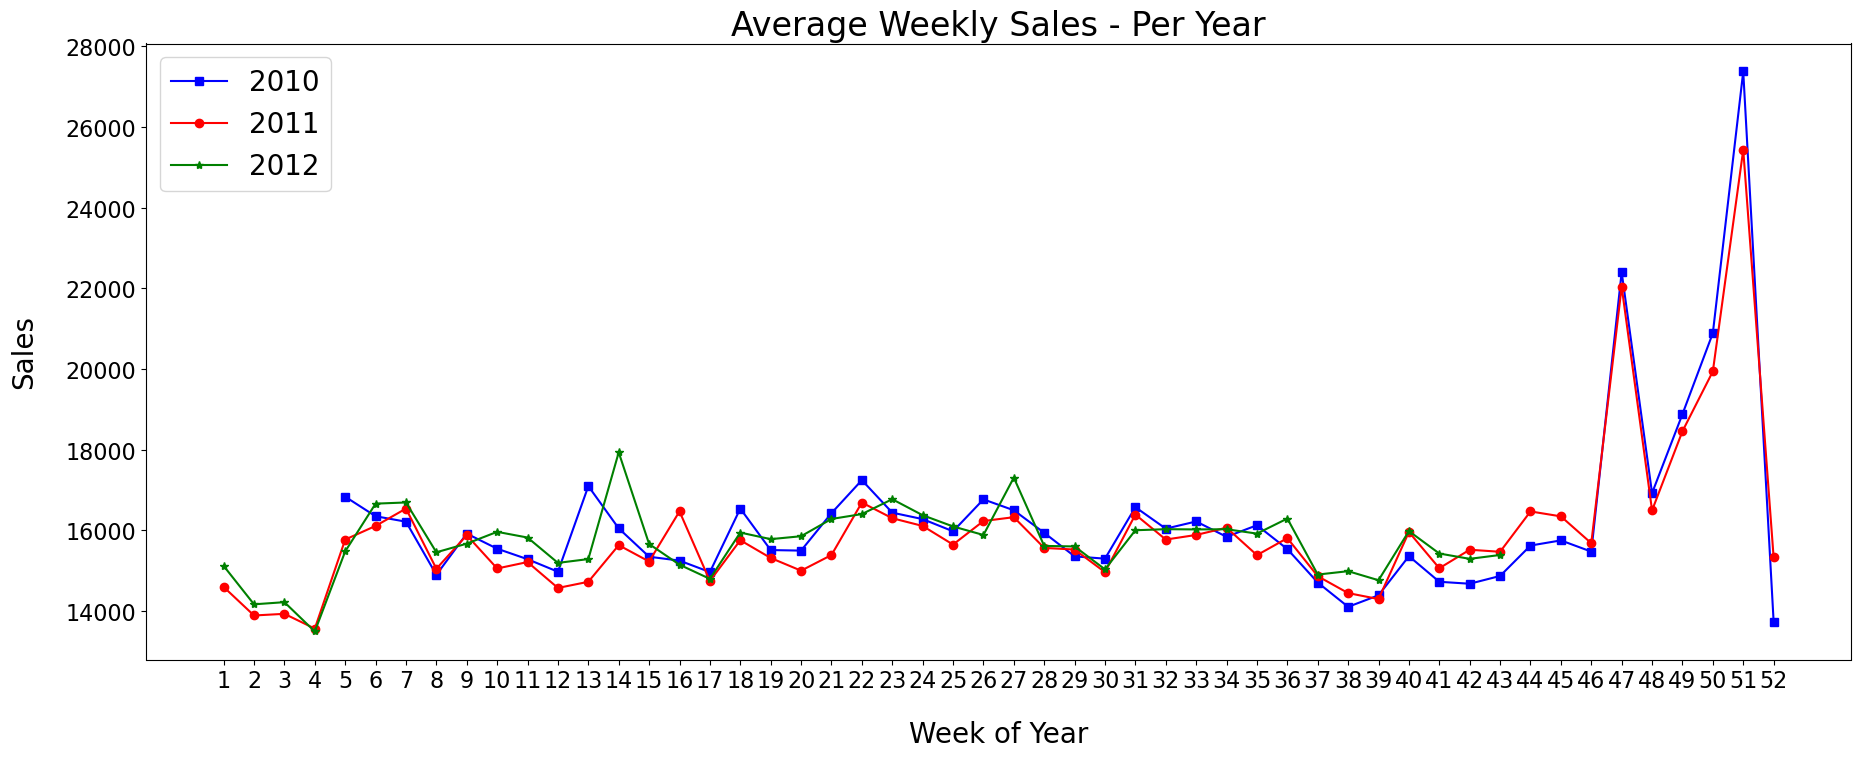

In [17]:
weekly_sales_2010 = master_df[master_df.Year==2010].groupby('Week_Number')['Weekly_Sales'].mean()
weekly_sales_2011 = master_df[master_df.Year==2011].groupby('Week_Number')['Weekly_Sales'].mean()
weekly_sales_2012 = master_df[master_df.Year==2012].groupby('Week_Number')['Weekly_Sales'].mean()

plt.figure(figsize=(22,8))
plt.plot(weekly_sales_2010.index, weekly_sales_2010.values, 's-b')
plt.plot(weekly_sales_2011.index, weekly_sales_2011.values, 'o-r')
plt.plot(weekly_sales_2012.index, weekly_sales_2012.values, '*-g')

plt.xticks(np.arange(1, 53, step=1), fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Week of Year', fontsize=20, labelpad=20)
plt.ylabel('Sales', fontsize=20, labelpad=20)

plt.title("Average Weekly Sales - Per Year", fontsize=24)
plt.legend(['2010', '2011', '2012'], fontsize=20);

Insights:

* Weekly basis the week of Thanksgiving holiday and one week before Christmas witnessed the highest sales for the years 2010 and 2011
* In 2012 the week no. 14 recorded the highest sales as compared to other weeks of the year but that doesn't correponds to any holiday or any special even

### Average Store Sales - Year Wise

In [18]:
store_sales_2010 = master_df[master_df.Year==2010].groupby('Store')['Weekly_Sales'].mean().to_dict()
store2010_df = pd.DataFrame(list(store_sales_2010.items()), columns=['Store', 'AvgSales2010'])

store_sales_2011 = master_df[master_df.Year==2011].groupby('Store')['Weekly_Sales'].mean().to_dict()
store2011_df = pd.DataFrame(list(store_sales_2011.items()), columns=['Store', 'AvgSales2011'])

store_sales_2012 = master_df[master_df.Year==2012].groupby('Store')['Weekly_Sales'].mean().to_dict()
store2012_df = pd.DataFrame(list(store_sales_2012.items()), columns=['Store', 'AvgSales2012'])

In [19]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=3, cols=1, subplot_titles=("Average Store Sales 2010", "Average Store Sales 2011", "Average Store Sales 2012"))

fig.add_trace(go.Bar(x=store2010_df.Store, y=store2010_df.AvgSales2010,),1, 1)

fig.add_trace(go.Bar(x=store2011_df.Store, y=store2011_df.AvgSales2011,),2, 1)

fig.add_trace(go.Bar(x=store2012_df.Store, y=store2012_df.AvgSales2012,),3, 1)

fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), template='plotly_dark', showlegend=False, height=1500)

fig.update_xaxes(title_text="Store", row=1, col=1)
fig.update_xaxes(title_text="Store", row=2, col=1)
fig.update_xaxes(title_text="Store", row=3, col=1)

fig.update_yaxes(title_text="AvgSales", row=1, col=1)
fig.update_yaxes(title_text="AvgSales", row=2, col=1)
fig.update_yaxes(title_text="AvgSales", row=3, col=1)

fig.update_xaxes(tick0=1, dtick=1)
fig.show()

Insights:

* The sales vary by large amount among the 45 stores

* It really depends which category of store it is and which week of the particular year is under consideration

* The overall trend of store sales over the 3 years remain the same as it depends on the type of store and its size

* The stores 2,4,13,14 and 20 showed the highest sales in all the 3 years

### Average Department Sales - Per Year

Let's check the department sales on yearly basis to see if there are some departments which have different levels of sales in 3 different years

In [20]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

dept_sales_2010 = master_df[master_df.Year==2010].groupby('Dept')['Weekly_Sales'].mean().to_dict()
dept2010_df = pd.DataFrame(list(dept_sales_2010.items()), columns=['Dept', 'AvgSales2010'])

dept_sales_2011 = master_df[master_df.Year==2011].groupby('Dept')['Weekly_Sales'].mean().to_dict()
dept2011_df = pd.DataFrame(list(dept_sales_2011.items()), columns=['Dept', 'AvgSales2011'])

dept_sales_2012 = master_df[master_df.Year==2012].groupby('Dept')['Weekly_Sales'].mean().to_dict()
dept2012_df = pd.DataFrame(list(dept_sales_2012.items()), columns=['Dept', 'AvgSales2012'])

fig = make_subplots(rows=1, cols=3, subplot_titles=("Average Dept Sales 2010", "Average Dept Sales 2011", "Average Dept Sales 2012"))

fig.add_trace(go.Bar(x=dept2010_df.AvgSales2010, y=dept2010_df.Dept, orientation='h',),1, 1)

fig.add_trace(go.Bar(x=dept2011_df.AvgSales2011, y=dept2011_df.Dept, orientation='h',),1, 2)

fig.add_trace(go.Bar(x=dept2012_df.AvgSales2012, y=dept2012_df.Dept, orientation='h',),1, 3)

fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), template = 'plotly_dark', showlegend=False, height=1000)

fig.update_xaxes(title_text="AvgSales", row=1, col=1)
fig.update_xaxes(title_text="AvgSales", row=1, col=2)
fig.update_xaxes(title_text="AvgSales", row=1, col=3)

fig.update_yaxes(title_text="Dept", row=1, col=1)
fig.update_yaxes(title_text="Dept", row=1, col=2)
fig.update_yaxes(title_text="Dept", row=1, col=3)

fig.update_yaxes(tick0=1, dtick=1)
fig.show()

Insights:

* The sales trend on yearly basis remain the same. 
* Stores with higher sales appeared in all the 3 years while with lowe sales showed the same trend in all the 3 years
* Different departments showed different levels of average sales
* Notables are 38,65,72,92 and 95 which have highest average sales

### Holidays Vs Nonholidays Sales

In [21]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

holiday_sales = master_df.groupby('IsHoliday')['Weekly_Sales'].mean()
holiday_counts = master_df.IsHoliday.value_counts()

fig = make_subplots(rows=1, cols=2, subplot_titles=("Holidays/Nonholidays Sales", "Holidays/Nonholidays Counts"))

fig.add_trace(go.Bar(x=holiday_sales.values, y=holiday_sales.index, orientation='h',),1, 1)

fig.add_trace(go.Bar(x=holiday_counts.values, y=holiday_counts.index, orientation='h',),1, 2)

fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), template='plotly_dark', showlegend=False)
fig.show()

Insights:

* Only 7 percent of the weeks in the data are the holiday weeks
* Despite being the less peecentage of holiday weeks the sales in the holidays week are on the average higher than in the non-holiday weeks

### Relationship: Week of Year vs Sales

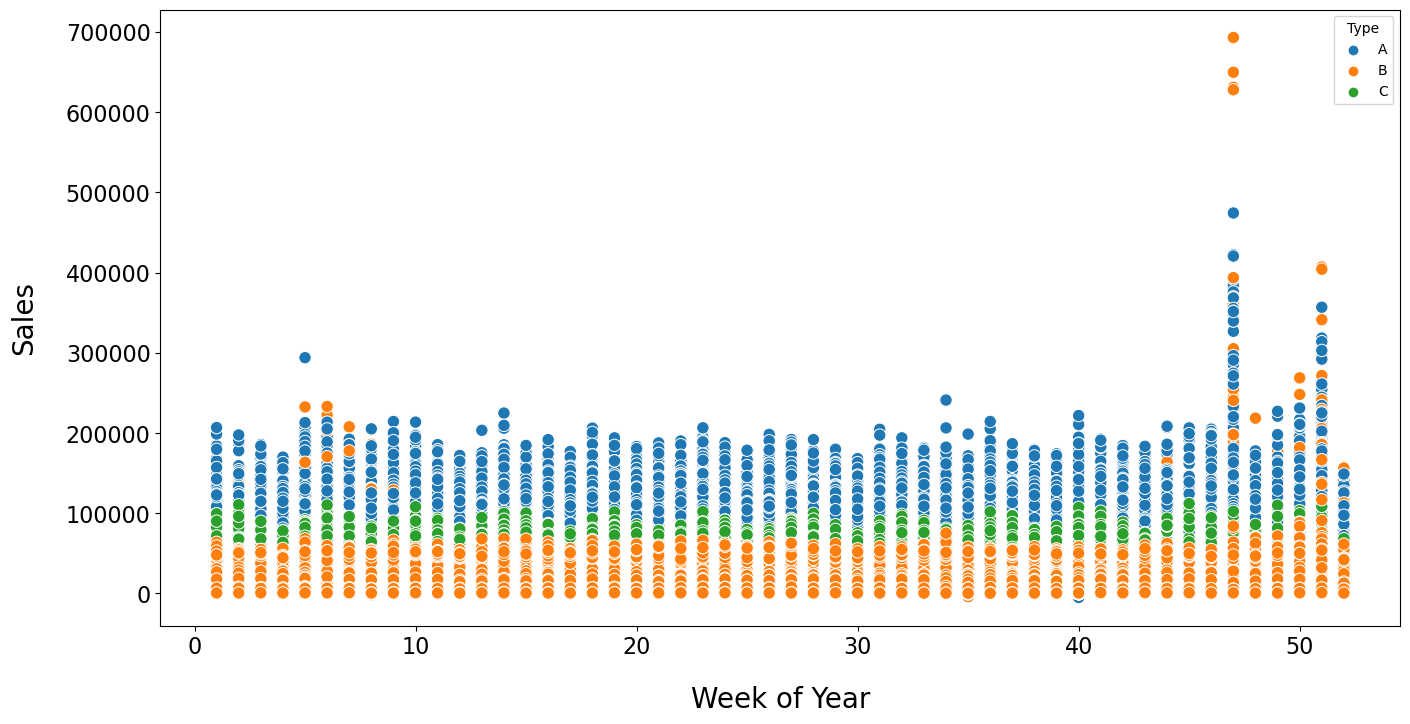

In [22]:
plt.figure(figsize=(16,8))
sns.scatterplot(x=master_df.Week_Number, y=master_df.Weekly_Sales, hue=master_df.Type, s=80);

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Week of Year', fontsize=20, labelpad=20)
plt.ylabel('Sales', fontsize=20, labelpad=20);


Insights:

This shows only a slight relationship as the weekly sales increased towards the end of the year

### Relationship: Size of Store vs Sales

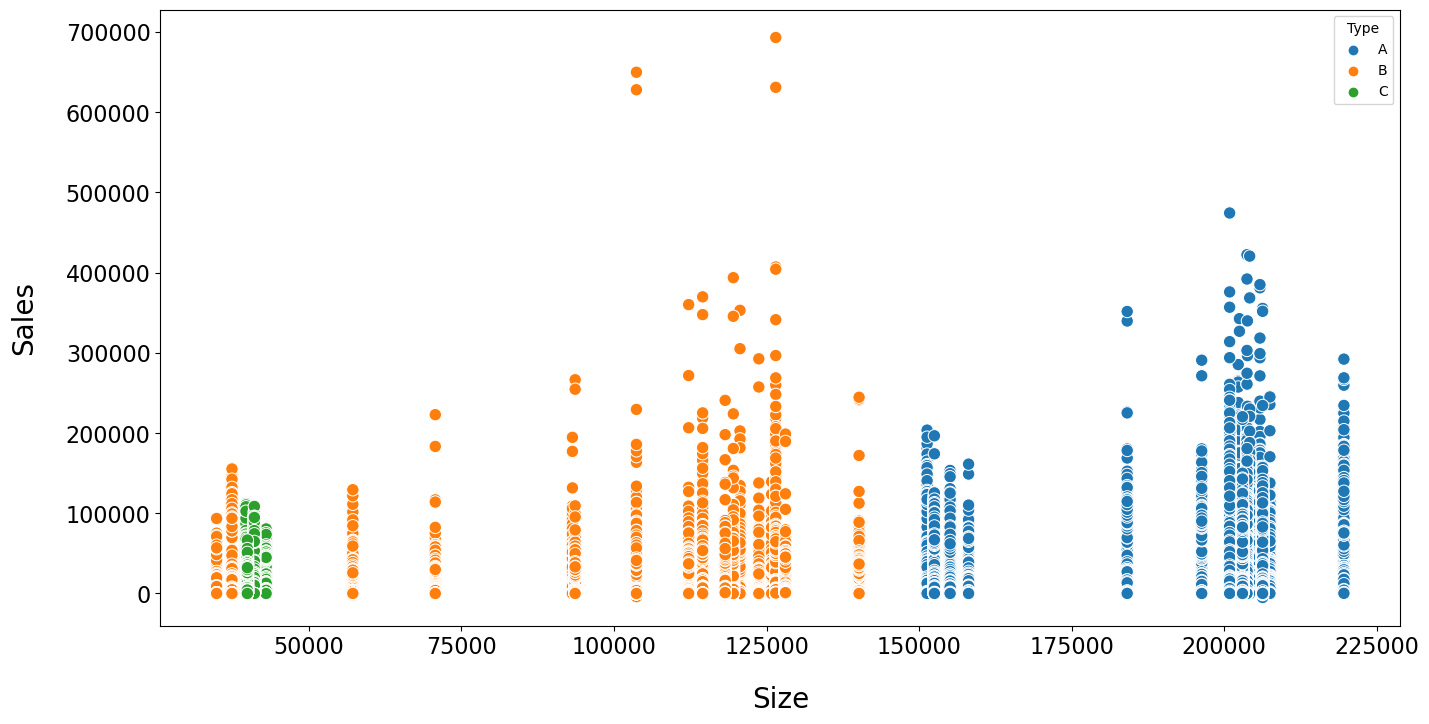

In [23]:
plt.figure(figsize=(16,8))
sns.scatterplot(x=master_df.Size, y=master_df.Weekly_Sales, hue=master_df.Type, s=80);

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Size', fontsize=20, labelpad=20)
plt.ylabel('Sales', fontsize=20, labelpad=20);

Insights:

* The size of the store shows a linear relationship with the weekly sales. The sales generally increases with increase of size of store with some exceptions

### Relationship: Temperature vs Sales

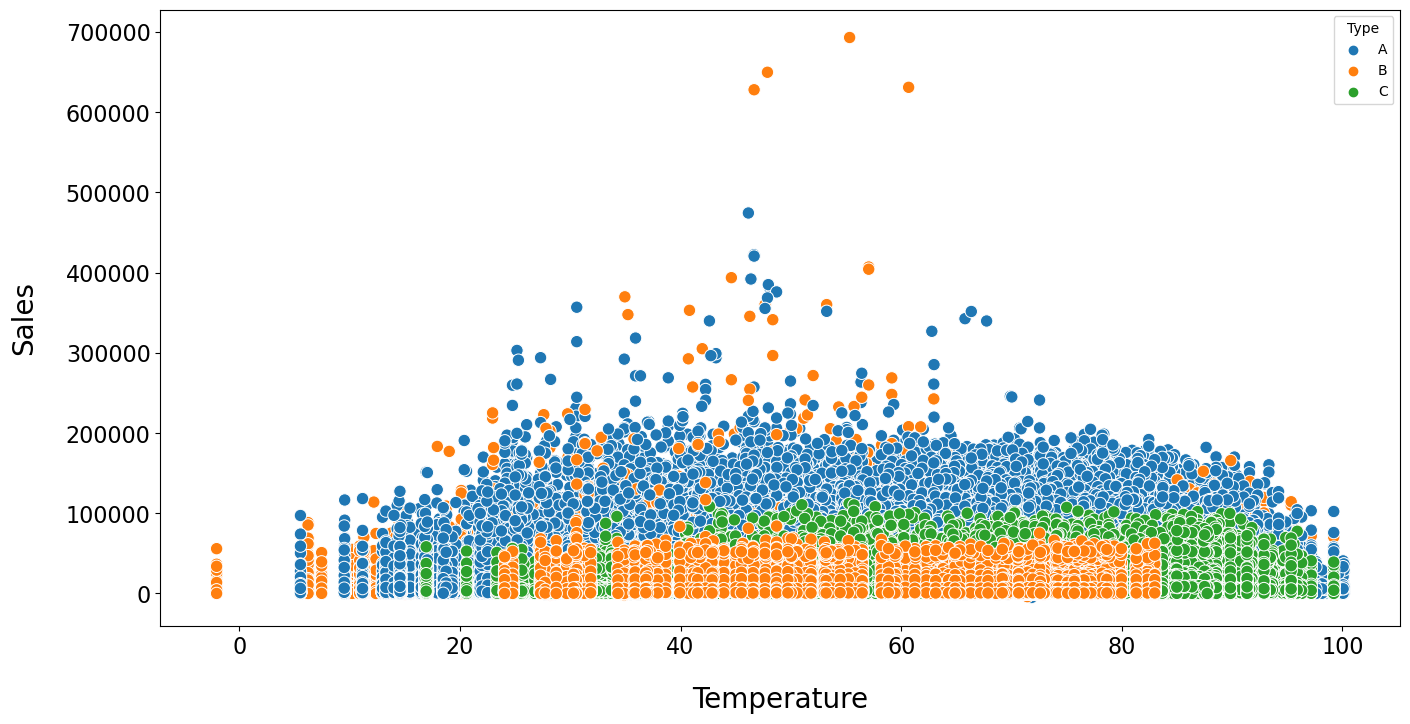

In [24]:
plt.figure(figsize=(16,8))
sns.scatterplot(x=master_df.Temperature, y=master_df.Weekly_Sales, hue=master_df.Type, s=80);

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Temperature', fontsize=20, labelpad=20)
plt.ylabel('Sales', fontsize=20, labelpad=20);

Insights:

* There seems to be no relatiobship between the temperature in the region and weekly sales of the stores. At low and very high temperatures the sales seems to dip a bit but in general there doesn't exist a clear relationship

### Relationship: Fuel Price vs Sales

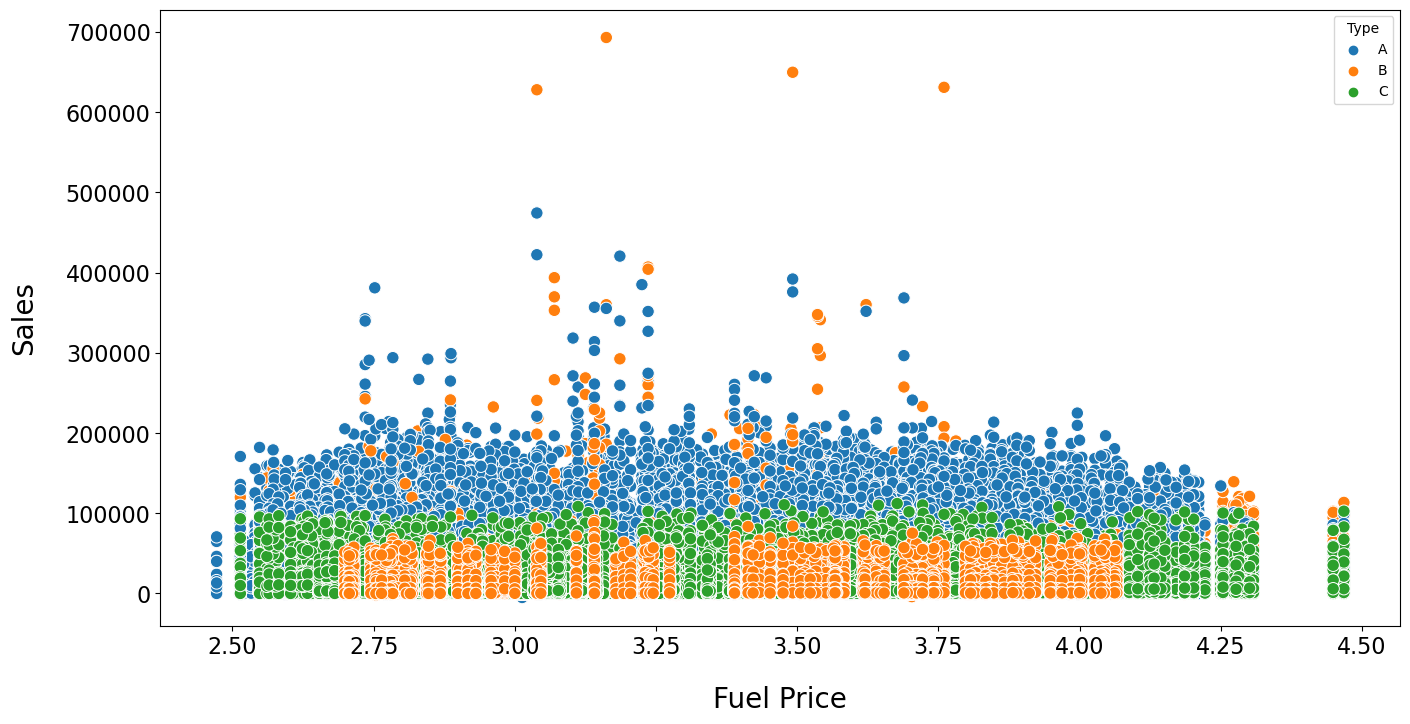

In [25]:
plt.figure(figsize=(16,8))
sns.scatterplot(x=master_df.Fuel_Price, y=master_df.Weekly_Sales, hue=master_df.Type, s=80);

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Fuel Price', fontsize=20, labelpad=20)
plt.ylabel('Sales', fontsize=20, labelpad=20);

Insights:

* Between fuel price and the sales there doesn't seem to exist any clear relationship

### Relationship: CPI vs Sales

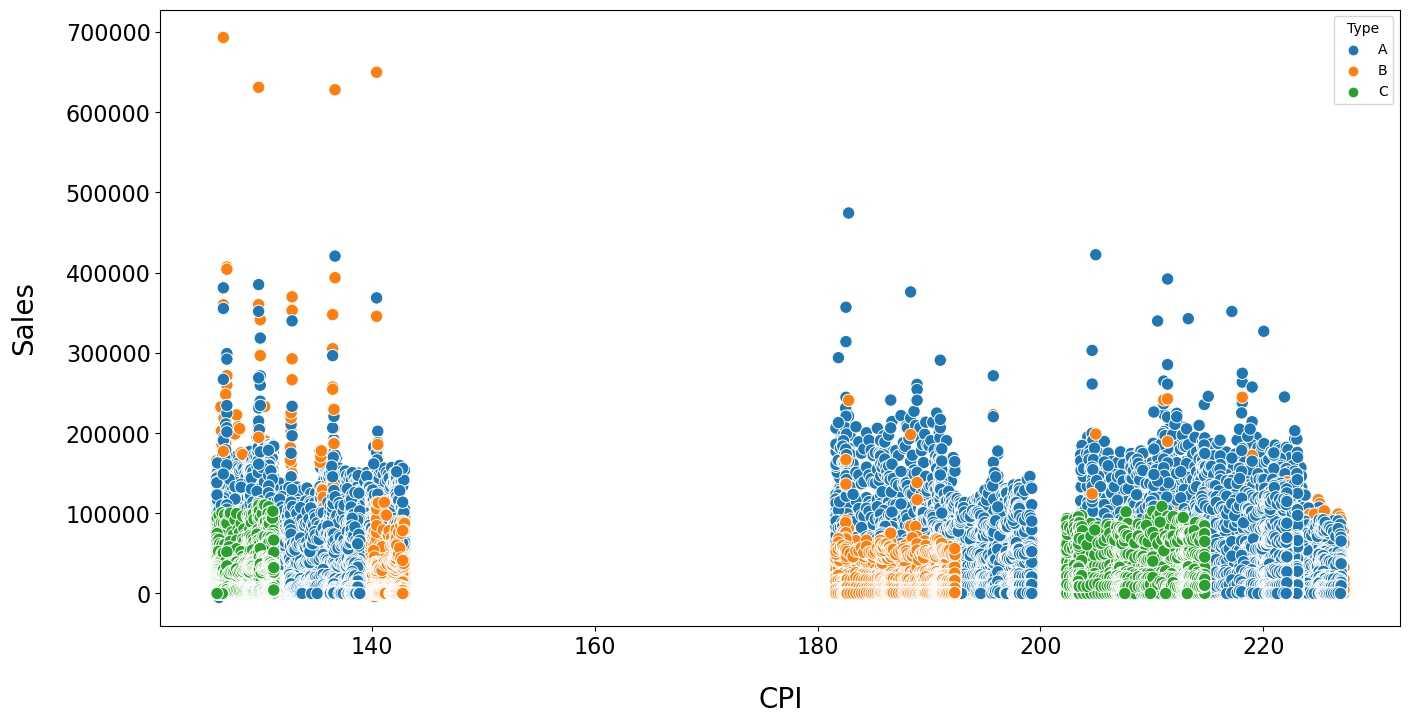

In [26]:
plt.figure(figsize=(16,8))
sns.scatterplot(x=master_df.CPI, y=master_df.Weekly_Sales, hue=master_df.Type, s=80);

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('CPI', fontsize=20, labelpad=20)
plt.ylabel('Sales', fontsize=20, labelpad=20);

Insights:

* There are 3 clear clusters but there doesn't exist any clear correlation between CPI and weekly sales

### Relationship: Unemployment vs Sales

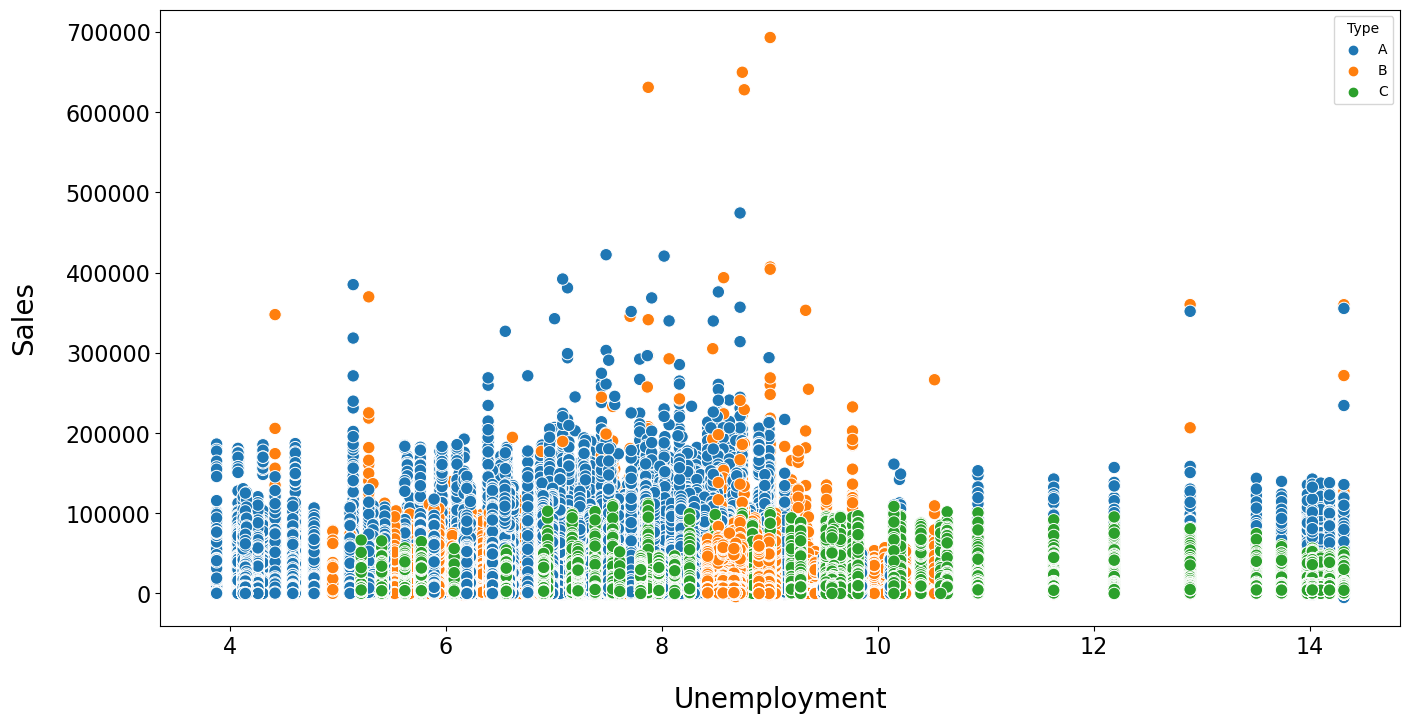

In [27]:
plt.figure(figsize=(16,8))
sns.scatterplot(x=master_df.Unemployment, y=master_df.Weekly_Sales, hue=master_df.Type, s=80);

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Unemployment', fontsize=20, labelpad=20)
plt.ylabel('Sales', fontsize=20, labelpad=20);

Insights:

* Also the Unemployment rate doesn't seem to have any effect on the weekly sales

### Label Encoding

In [28]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'master_df'.
master_df['Type']= label_encoder.fit_transform(master_df['Type'])
master_df['IsHoliday']= label_encoder.fit_transform(master_df['IsHoliday'])
master_df['Month']= label_encoder.fit_transform(master_df['Month'])


### Correlation Matrix

Lets study the relationship between the different columns numerically to check how they correlate with the weekly sales in order to confirm the inferences we have gathered from the above EDA study. Since the correlation value can only be calculated for the numerical columns, so we will first convert the 'Type' column to numerical values. Type 'A', 'B' and 'C' will be mapped to 1, 2 and 3 respectively

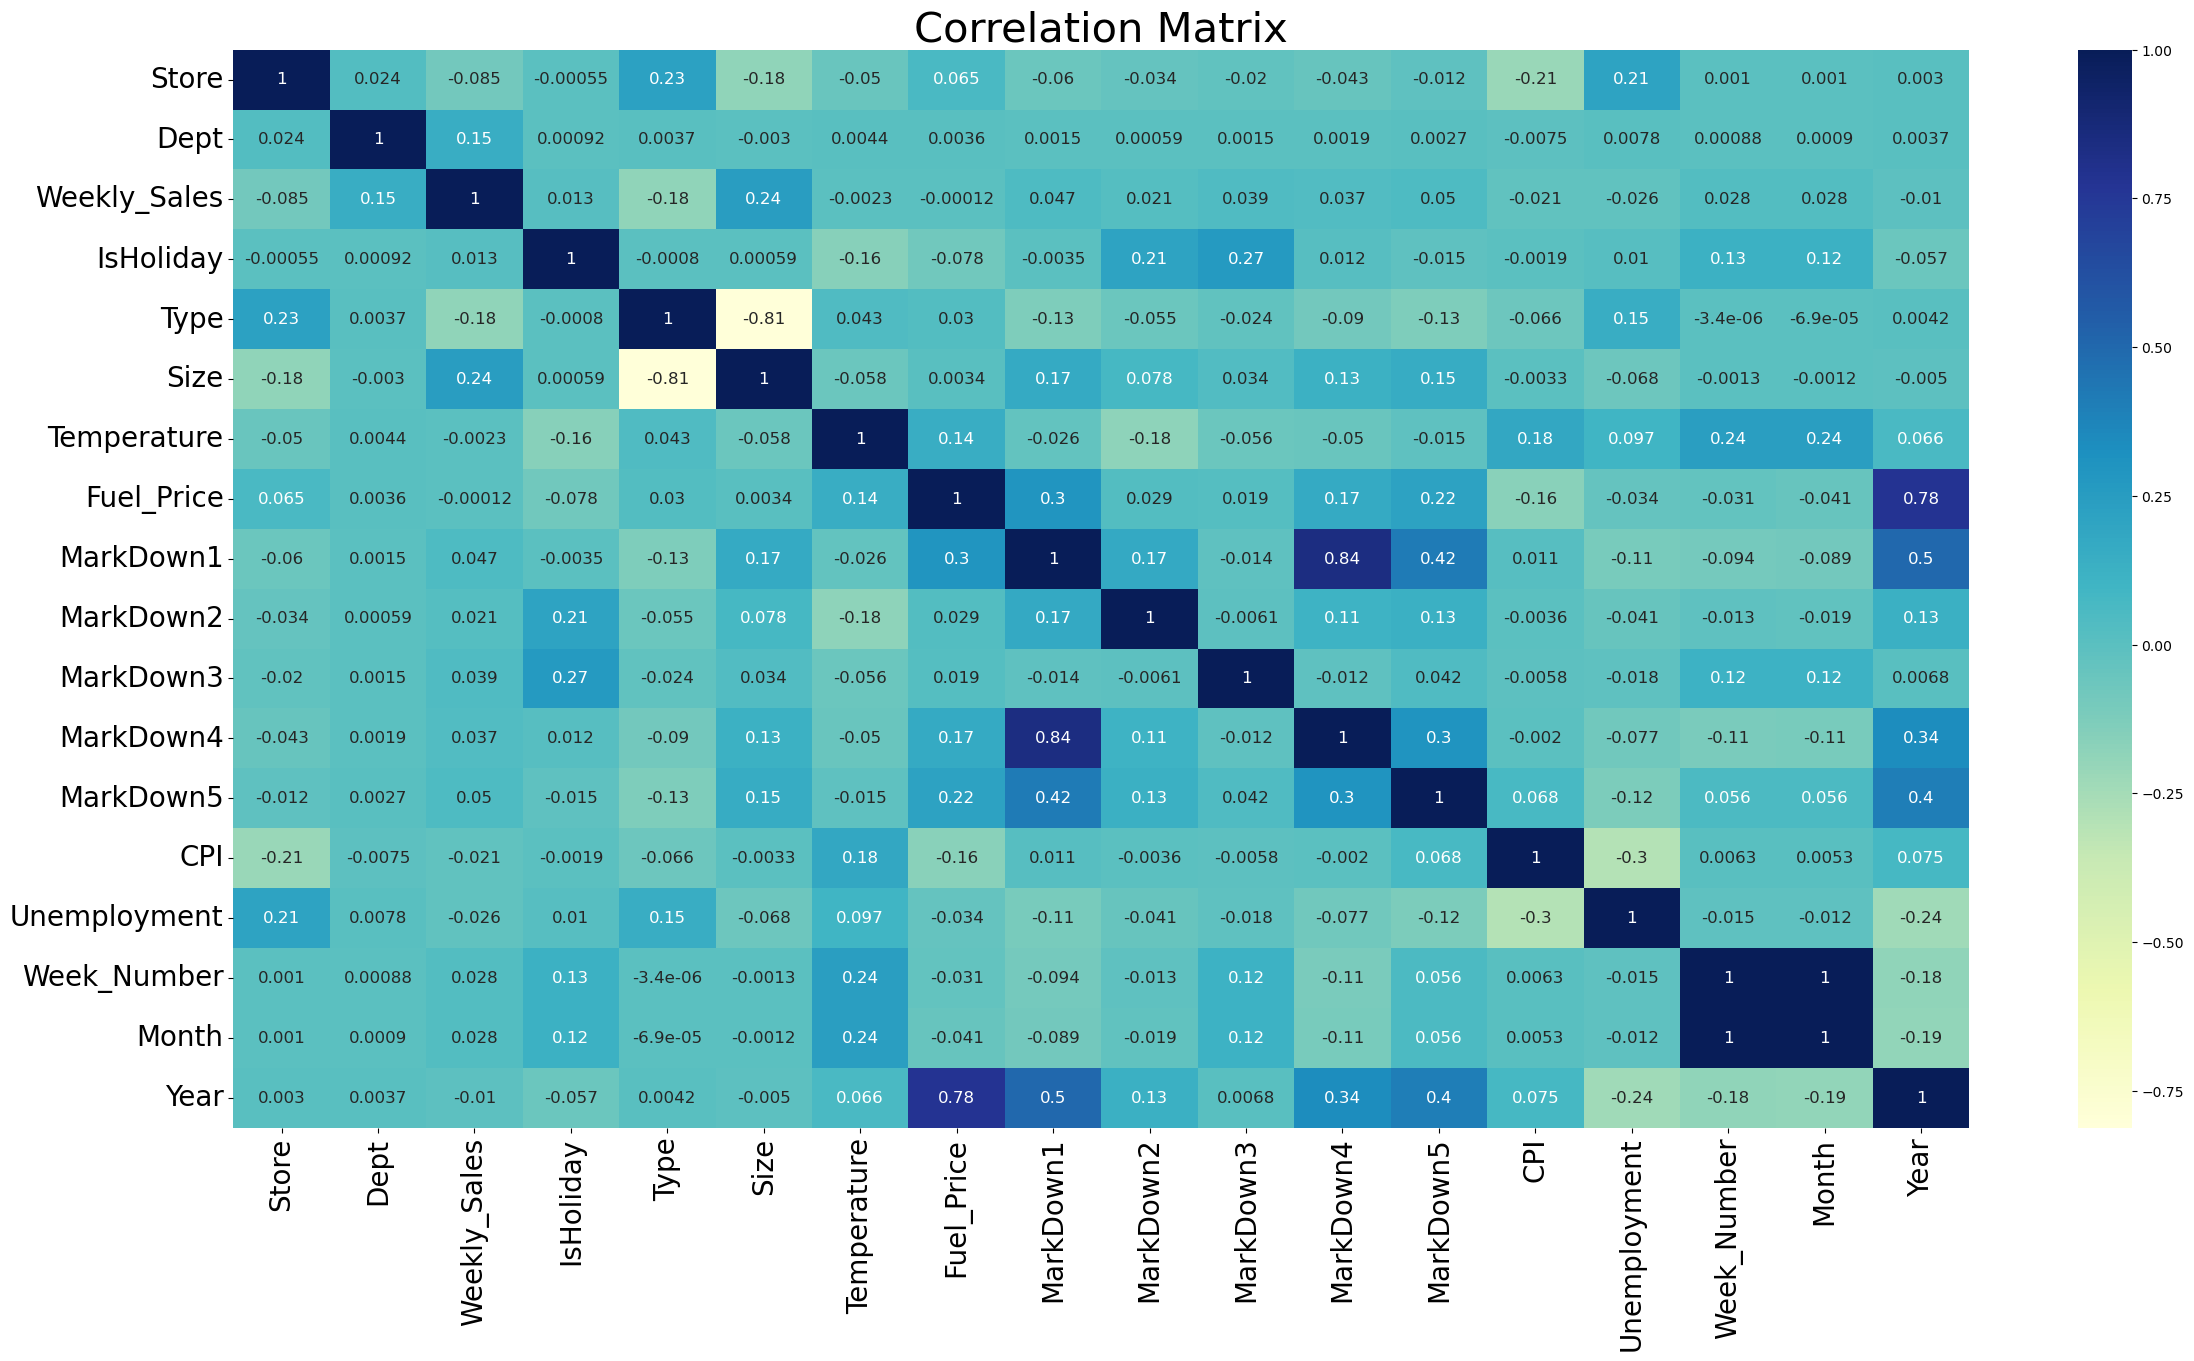

In [29]:
plt.figure(figsize=(28,14))
plt.xticks( fontsize=20)
plt.yticks( fontsize=20)

sns.heatmap(master_df.corr(), cmap='YlGnBu', annot=True, annot_kws={'size':12})
plt.title('Correlation Matrix', fontsize=30);

Insights:

* Department, Store size and Type have moderate correlation with the weekly sales
* Markdown1-5 have very weak correlation with the weekly sales, so we will leave these columns out
* Temperature. Fuel price, CPI and Unemployment are very weakly coorelated with the weekly sales, so these columns will also be dropped out
* IsHoliday will be considered for the further analysis as the sales in the holiday weeks are higher than in the non-holiday weeks
* We will also leave out Month and Day as this information is already contained in the WeekOfYear

### 3. Data Preparation for Model Training

Following steps will be performed for preparing the data for the subsequent model training

* Based on the Exploratory Data Analysis and Coorelation study, the columns with weak relationship with the target column will be dropped
* Input and Target dataframes will be created
* Inputs will be scaled in the 0 to 1 range
* Training and Validation datasets will be created
* A function will be defined based on which the models performance will be measured

### Creating Lagged Variables

In [30]:
master_df=master_df.sort_values(by=['Store', 'Dept', 'Year', 'Week_Number'], ascending=True)    

# Previous week sales
shifted_sales = master_df.shift(1)
master_df_new_var = master_df.join(shifted_sales[['Store', 'Dept', 'Week_Number', 'Weekly_Sales', 'Year']], rsuffix='_Lag')
master_df_new_var.loc[(master_df_new_var.Dept != master_df_new_var.Dept_Lag) |  (master_df_new_var.Store != master_df_new_var.Store_Lag), 'Weekly_Sales_Lag'] = -2

In [31]:
x = master_df_new_var.drop(['Date', 'Weekly_Sales', 'IsHoliday','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','Year', 'Week_Number',  'Month',
                   'Store_Lag', 'Dept_Lag', 'Week_Number_Lag', 'Year_Lag'],axis=1)
y = master_df_new_var['Weekly_Sales']

## 4. Machine Learning


Following ML models will be tested in this study:

* Linear Regression
* Ridge Regression
* Lasso Regression
* Decision Tree
* Random Forest
* Gradient Boosting Machine

### Dividing the dataset into test & train dataset

In [32]:
# split the data into train and test 
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=9876)

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#### Linear Regression

In [34]:
from sklearn.linear_model import LinearRegression

# create model
Linear_model = LinearRegression()
# print(model.get_params())

# train the model
Linear_model.fit(x_train, y_train)

LinearRegression()

In [35]:
# predict the values from x_test
y_prediction = Linear_model.predict(x_test)
# print(y_prediction)

In [36]:
MAE = mean_absolute_error(y_test, y_prediction)
print(f"MAE = {MAE}")

MAE = 2486.863390352161


In [37]:
MSE = mean_squared_error(y_test, y_prediction)
print(f"MSE = {MSE}")

MSE = 54134057.35856109


In [38]:
RMSE = np.sqrt(MSE)
print(f"RMSE = {RMSE}")

RMSE = 7357.585022176848


In [39]:
R2 = r2_score(y_test, y_prediction)
print(f"R2 = {R2}")

R2 = 0.8960227837658292


#### Ridge Regression

In [40]:
from sklearn.linear_model import Ridge

# create model
Ridge_model = Ridge()
# print(model.get_params())

# train the model
Ridge_model.fit(x_train, y_train) 

Ridge()

In [41]:
# predict the values from x_test
y_prediction = Ridge_model.predict(x_test)
# print(y_prediction)

In [42]:
MAE = mean_absolute_error(y_test, y_prediction)
print(f"MAE = {MAE}")

MAE = 2486.8632107473722


In [43]:
MSE = mean_squared_error(y_test, y_prediction)
print(f"MSE = {MSE}")

MSE = 54134057.2004791


In [44]:
RMSE = np.sqrt(MSE)
print(f"RMSE = {RMSE}")

RMSE = 7357.585011434057


In [45]:
R2 = r2_score(y_test, y_prediction)
print(f"R2 = {R2}")

R2 = 0.896022784069463


#### Lasso Regression

In [46]:
from sklearn.linear_model import Lasso

# create model
Lasso_model = Lasso()
# print(model.get_params())

# train the model
Lasso_model.fit(x_train, y_train)

Lasso()

In [47]:
# predict the values from x_test
y_prediction = Lasso_model.predict(x_test)
# print(y_prediction)

In [48]:
MAE = mean_absolute_error(y_test, y_prediction)
print(f"MAE = {MAE}")

MAE = 2486.569970322704


In [49]:
MSE = mean_squared_error(y_test, y_prediction)
print(f"MSE = {MSE}")

MSE = 54133700.25002511


In [50]:
RMSE = np.sqrt(MSE)
print(f"RMSE = {RMSE}")

RMSE = 7357.560754083183


In [51]:
R2 = r2_score(y_test, y_prediction)
print(f"R2 = {R2}")

R2 = 0.896023469676941


#### Decision Tree 

In [52]:
from sklearn.tree import DecisionTreeRegressor

# create model
Tree_model = DecisionTreeRegressor()
# print(model.get_params())

# train the model
Tree_model.fit(x_train, y_train)

DecisionTreeRegressor()

In [53]:
# predict the values from x_test
y_prediction = Tree_model.predict(x_test)
# print(y_prediction)

In [54]:
MAE = mean_absolute_error(y_test, y_prediction)
print(f"MAE = {MAE}")

MAE = 2955.2620053609126


In [55]:
MSE = mean_squared_error(y_test, y_prediction)
print(f"MSE = {MSE}")

MSE = 64188597.85448144


In [56]:
RMSE = np.sqrt(MSE)
print(f"RMSE = {RMSE}")

RMSE = 8011.7786948018875


In [57]:
R2 = r2_score(y_test, y_prediction)
print(f"R2 = {R2}")

R2 = 0.8767106689477036


#### Random Forest

In [58]:
from sklearn.ensemble import RandomForestRegressor

# create model
Random_model = RandomForestRegressor(n_estimators=50)
# print(model.get_params())

# train the model
Random_model.fit(x_train, y_train)

RandomForestRegressor(n_estimators=50)

In [59]:
# predict the values from x_test
y_prediction = Random_model.predict(x_test)
# print(y_prediction)

In [60]:
MAE = mean_absolute_error(y_test, y_prediction)
print(f"MAE = {MAE}")

MAE = 2076.34689382309


In [61]:
MSE = mean_squared_error(y_test, y_prediction)
print(f"MSE = {MSE}")

MSE = 34962581.627101526


In [62]:
RMSE = np.sqrt(MSE)
print(f"RMSE = {RMSE}")

RMSE = 5912.91650770595


In [63]:
R2 = r2_score(y_test, y_prediction)
print(f"R2 = {R2}")

R2 = 0.9328461215115059


#### Gradient Boosting Machine

In [64]:
from xgboost import XGBRegressor

# create model
XGBoost_model = XGBRegressor()
# print(model.get_params())

# train the model
XGBoost_model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [65]:
# predict the values from x_test
y_prediction = XGBoost_model.predict(x_test)
# print(y_prediction)

In [66]:
MAE = mean_absolute_error(y_test, y_prediction)
print(f"MAE = {MAE}")

MAE = 1940.9964987306223


In [67]:
MSE = mean_squared_error(y_test, y_prediction)
print(f"MSE = {MSE}")

MSE = 28401989.924245406


In [68]:
RMSE = np.sqrt(MSE)
print(f"RMSE = {RMSE}")

RMSE = 5329.351735834801


In [69]:
R2 = r2_score(y_test, y_prediction)
print(f"R2 = {R2}")

R2 = 0.945447284169492


### Model's Comparison

#### Linear Regression

* MAE : 2486.86
* MSE : 5413057.35
* R2 Score : 0.89

#### Ridge Regression

* MAE : 2486.86
* MSE : 5413057.35
* R2 Score : 0.89

#### Lasso Regression

* MAE : 2486.56
* MSE : 54133700.25
* R2 Score : 0.89

#### Decision Tree 

* MAE : 2949.92
* MSE : 64745607.77
* R2 Score : 0.87

#### Random Forest

* MAE : 2056.79
* MSE : 34621282.35
* R2 Score : 0.93

#### XG Boosting Machine

* MAE : 1940.99
* MSE : 28401994.41
* R2 Score : 0.94

The best performer among the tested models is ***'Gradient Boosting Machine'*** 


## Making Predictions

In [70]:
import joblib

In [71]:
joblib.dump(XGBoost_model, 'test_walmart.pkl')


['test_walmart.pkl']

In [72]:
x_test.head(5)

Store  Dept  Type    Size  Temperature  Fuel_Price         CPI  \
233058     24    49     0  203819        58.86       4.158  138.739500   
373876     40    23     0  155083        64.83       3.809  136.274581   
276738     28    96     0  206302        66.73       4.222  131.117333   
233357     24    52     0  203819        73.26       3.819  138.173581   
301858     31    81     0  203750        87.57       3.524  214.836868   

        Unemployment  Weekly_Sales_Lag  
233058         8.953           5208.75  
373876         4.584          12138.84  
276738        11.627          31240.72  
233357         8.953           1083.81  
301858         7.852          25034.84

In [73]:
#result= XGBoost_model.predict(np.array([[24,49,0,203819,58.86,4.158,138.739500,8.953,5208.75]]))
#result

### Inferences and Conclusions


Following inferences and conclusions can be drawn from the the analysis of the data:

* Type 'A' stores are more popular than 'B' and 'C' types

* Type 'A' stores outclass the 'B' and 'C' types in terms of size and the avergae weekly sales

* Weekly Sales are effected by the week of year. Holiday weeks witnessed more sales than the non-holiday weeks. Notables are Thanksgiving and Christmas weeks

* Size of the store is a major contributing factor in the weekly sales

* Sales are also dependent on the department of the store as different departments showed different levels of weekly sales

* Among the trained models for predicting the future sales, *Grdient Boosting Machine* performs the best
